<div style="text-align: center; background-color:rgb(97, 76, 175); padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 50px; font-weight: bold;">Data Analysis & Visualization</span>
</div>

Import libraries we can use to analysis and visualization

In [50]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway, ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **Data Cleaning**

- Understand the data by displaying the first and last rows.
  

load the dataset cleaned 

In [7]:
cars_sales = pd.read_csv("../Milestone1/Car_sales_CleanData.csv", index_col=0)
cars_sales.head()

,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,DayOfWeek,Season
Date,,,,,,,,,,,,,,,,,,
2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2022,1,6,Winter
2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2022,1,6,Winter
2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2022,1,6,Winter
2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,1,6,Winter
2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022,1,6,Winter


In [8]:
cars_sales.tail()

,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,DayOfWeek,Season
Date,,,,,,,,,,,,,,,,,,
2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,2023,12,6,Winter
2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,2023,12,6,Winter
2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,2023,12,6,Winter
2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,2023,12,6,Winter
2023-12-31,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown,2023,12,6,Winter


Descriptive Statistics

In [9]:
print(cars_sales.describe())

       Annual Income     Price ($)         Phone          Year         Month  \
count   2.309000e+04  23090.000000  2.309000e+04  23090.000000  23090.000000   
mean    7.496422e+05  28056.275141  7.496992e+06   2022.556345      7.862365   
std     5.636098e+05  14772.941155  8.674751e+05      0.496826      3.257235   
min     1.008000e+04   1200.000000  6.000101e+06   2022.000000      1.000000   
25%     3.600000e+05  18001.000000  6.745404e+06   2022.000000      5.000000   
50%     7.150000e+05  23000.000000  7.494542e+06   2023.000000      9.000000   
75%     1.100000e+06  34000.000000  8.247365e+06   2023.000000     11.000000   
max     2.360000e+06  85800.000000  8.999305e+06   2023.000000     12.000000   

          DayOfWeek  
count  23090.000000  
mean       2.967042  
std        2.173352  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000  


In [10]:
cars_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23090 entries, 2022-01-02 to 2023-12-31
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  23090 non-null  object
 1   Gender         23090 non-null  object
 2   Annual Income  23090 non-null  int64 
 3   Dealer_Name    23090 non-null  object
 4   Company        23090 non-null  object
 5   Model          23090 non-null  object
 6   Engine         23090 non-null  object
 7   Transmission   23090 non-null  object
 8   Color          23090 non-null  object
 9   Price ($)      23090 non-null  int64 
 10  Dealer_No      23090 non-null  object
 11  Body Style     23090 non-null  object
 12  Phone          23090 non-null  int64 
 13  Dealer_Region  23090 non-null  object
 14  Year           23090 non-null  int64 
 15  Month          23090 non-null  int64 
 16  DayOfWeek      23090 non-null  int64 
 17  Season         23090 non-null  object
dtypes: int64(6), obje

In [11]:
# Rename the 'Price' column to 'price'
cars_sales.rename(columns={'Price ($)': 'Price'}, inplace=True)

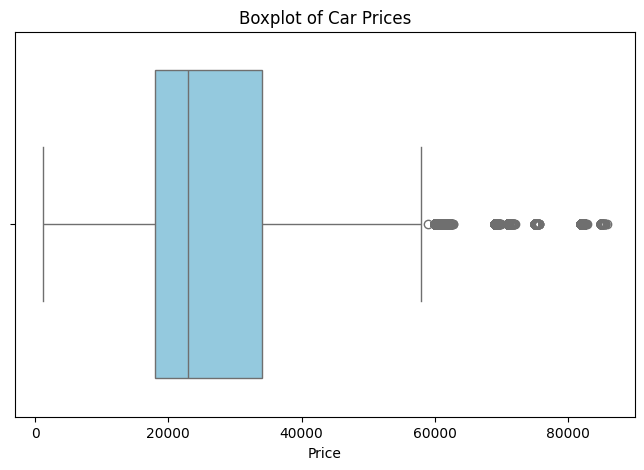

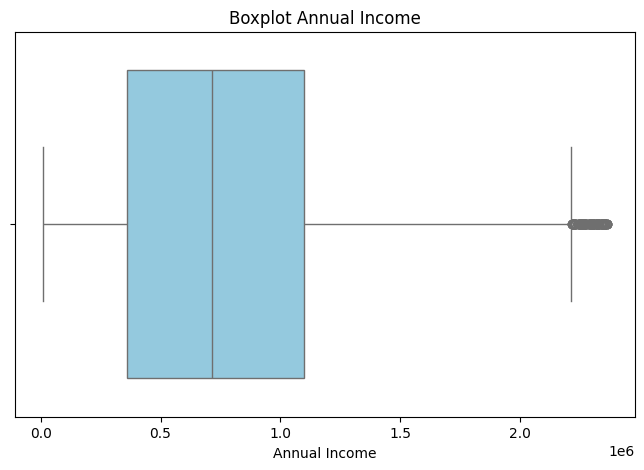

In [12]:
# Boxplot for Price
plt.figure(figsize=(8, 5))
sns.boxplot(x=cars_sales["Price"], color="skyblue")
plt.title("Boxplot of Car Prices")
plt.xlabel("Price")
plt.show()

# Boxplot for Annol Income
plt.figure(figsize=(8, 5))
sns.boxplot(x=cars_sales["Annual Income"], color="skyblue")
plt.title("Boxplot Annual Income")
plt.xlabel("Annual Income")
plt.show()


## **Encoding the Columns**

In [13]:
# Identify columns that are categorical (object or category dtype)
cat_cols = cars_sales.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical Columns:", cat_cols)

Categorical Columns: ['Customer Name', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No ', 'Body Style', 'Dealer_Region', 'Season']


In [14]:
from sklearn.preprocessing import LabelEncoder

# Drop "Customer Name" column
cars_sales = cars_sales.drop(columns=['Customer Name'], inplace=False) 

# Label Encoding for Gender
le_gender = LabelEncoder()
cars_sales["Gender"] = le_gender.fit_transform(cars_sales["Gender"])
cars_sales["Transmission"] = le_gender.fit_transform(cars_sales["Transmission"])



# Display transformed data
print(cars_sales.head())


            Gender  Annual Income                          Dealer_Name  \
Date                                                                     
2022-01-02       1          13500  Buddy Storbeck's Diesel Service Inc   
2022-01-02       1        1480000                     C & M Motors Inc   
2022-01-02       1        1035000                          Capitol KIA   
2022-01-02       1          13500               Chrysler of Tri-Cities   
2022-01-02       1        1465000                    Chrysler Plymouth   

             Company       Model                     Engine  Transmission  \
Date                                                                        
2022-01-02      Ford  Expedition  DoubleÂ Overhead Camshaft             0   
2022-01-02     Dodge     Durango  DoubleÂ Overhead Camshaft             0   
2022-01-02  Cadillac    Eldorado          Overhead Camshaft             1   
2022-01-02    Toyota      Celica          Overhead Camshaft             1   
2022-01-02     Acur

In [15]:
print(type(cars_sales))
cars_sales.head()

<class 'pandas.core.frame.DataFrame'>


,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,DayOfWeek,Season
Date,,,,,,,,,,,,,,,,,
2022-01-02,1,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,0,Black,26000,06457-3834,SUV,8264678,Middletown,2022,1,6,Winter
2022-01-02,1,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,0,Black,19000,60504-7114,SUV,6848189,Aurora,2022,1,6,Winter
2022-01-02,1,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,1,Red,31500,38701-8047,Passenger,7298798,Greenville,2022,1,6,Winter
2022-01-02,1,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,1,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,1,6,Winter
2022-01-02,1,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,0,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022,1,6,Winter


# **Data Analysis**

## **Check for Correlations**
- Analyze relationships between numerical variables using a correlation matrix:

Filter numerical columns and Drop Irrelevant Numerical Columns


In [16]:
# Filter only numerical columns
numerical_data = cars_sales.select_dtypes(include=['number'])

# Replace 'Phone' with the irrelevant column name
numerical_data = numerical_data.drop(['Phone'], axis=1) 

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()
print(correlation_matrix)



                 Gender  Annual Income  Transmission     Price      Year  \
Gender         1.000000       0.058489      0.003399 -0.005752 -0.031568   
Annual Income  0.058489       1.000000     -0.004005  0.004158 -0.030524   
Transmission   0.003399      -0.004005      1.000000 -0.010472  0.008149   
Price         -0.005752       0.004158     -0.010472  1.000000 -0.006316   
Year          -0.031568      -0.030524      0.008149 -0.006316  1.000000   
Month          0.033146      -0.006384     -0.010433  0.006045 -0.021543   
DayOfWeek      0.006551       0.002159      0.008515  0.000592  0.020672   

                  Month  DayOfWeek  
Gender         0.033146   0.006551  
Annual Income -0.006384   0.002159  
Transmission  -0.010433   0.008515  
Price          0.006045   0.000592  
Year          -0.021543   0.020672  
Month          1.000000   0.035101  
DayOfWeek      0.035101   1.000000  


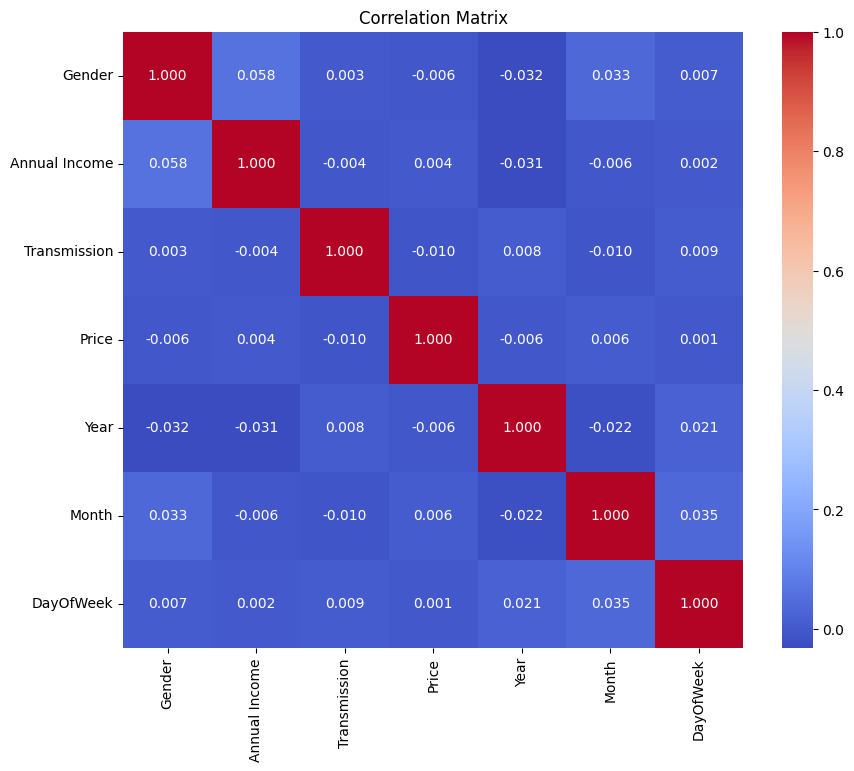

In [17]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

### show some more ways to check the correlation 
- The choice of correlation coefficient depends on the nature of the variables and the type of relationship between them.

Method	Use Case
Pearson Correlation	Continuous numerical variables with linear relationships
Spearman Correlation	Non-linear monotonic relationships
Kendall’s Tau	Small datasets or ordinal data
Chi-Square Test	Categorical variable dependencies
Mutual Information	Non-linear relationships between numerical and categorical variables

#### **Pearson Correlation**	
- Continuous numerical variables with linear relationships


In [ ]:
# Select only numeric columns and exclude 'Phone'
numeric_cars_sales = cars_sales.select_dtypes(include=['number']).drop(columns=["Phone" , "DayOfWeek" ])


In [ ]:
# Compute Pearson correlation matrix
correlation_matrix = numeric_cars_sales.corr(method='pearson')
# Display correlation with target variable (Price)
print(correlation_matrix["Price"].sort_values(ascending=False))



Price            1.000000
Month            0.006045
Annual Income    0.004158
Gender          -0.005752
Year            -0.006316
Transmission    -0.010472
Name: Price, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\1862741217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette="coolwarm")


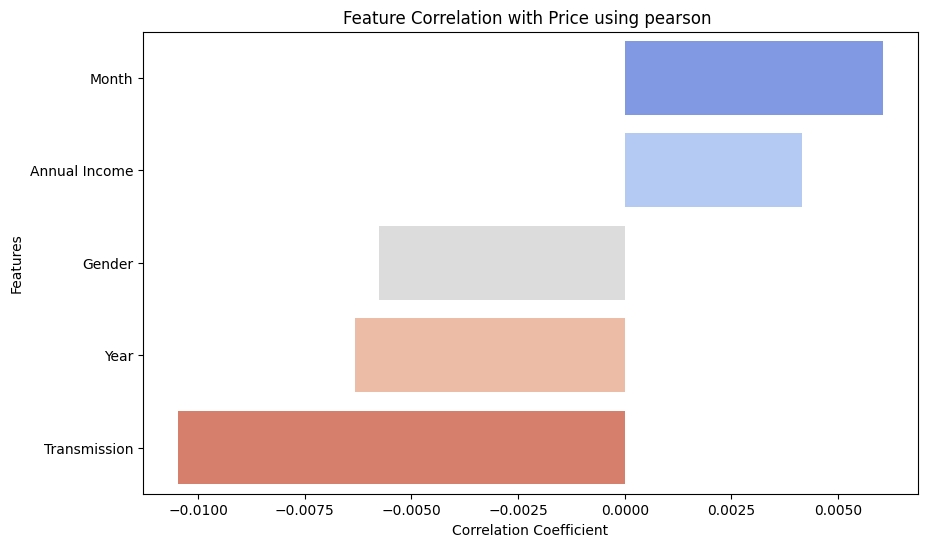

In [20]:
# Remove self-correlation and sort values
correlation_with_price = correlation_matrix["Price"].drop("Price")
correlation_with_price.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette="coolwarm")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.title("Feature Correlation with Price using pearson ")
plt.show()


#### **Spearman Rank Correlation**
- Ordinal or continuous variables with non-linear relationships

In [ ]:
spearman_corr = numeric_cars_sales.corr(method='spearman')
print(spearman_corr["Price"].sort_values(ascending=False))

Price            1.000000
Annual Income    0.013490
Month            0.005531
Gender          -0.002014
Year            -0.004955
Transmission    -0.056496
Name: Price, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\3013881224.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette="coolwarm")


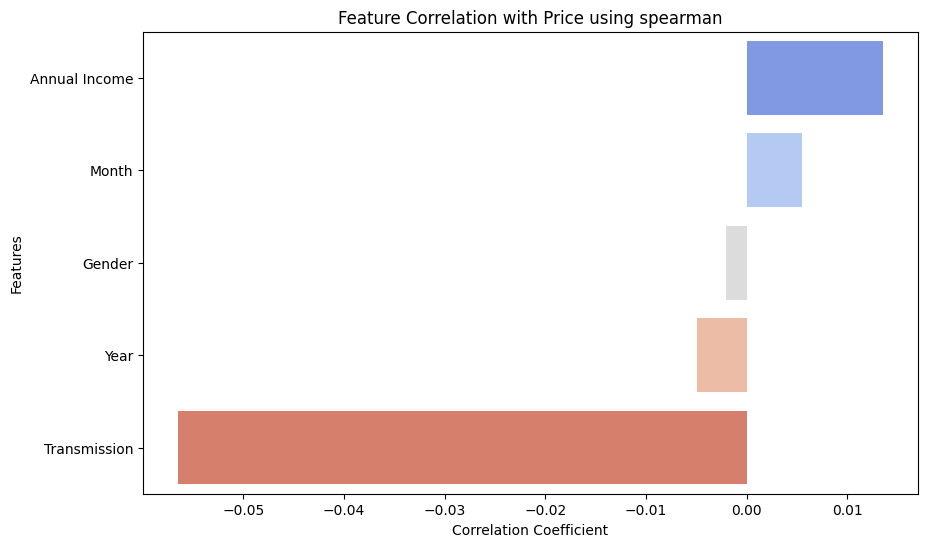

In [22]:
# Remove self-correlation and sort values
correlation_with_price = spearman_corr["Price"].drop("Price")
correlation_with_price.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette="coolwarm")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.title("Feature Correlation with Price using spearman")
plt.show()

#### **Kendall’s Tau**	
 -  Small datasets or ordinal data

In [ ]:
correlation_kendall = numeric_cars_sales.corr(method='kendall')
print(correlation_kendall["Price"].sort_values(ascending=False))

Price            1.000000
Annual Income    0.009237
Month            0.003881
Gender          -0.001658
Year            -0.004077
Transmission    -0.046488
Name: Price, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\827205466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette="coolwarm")


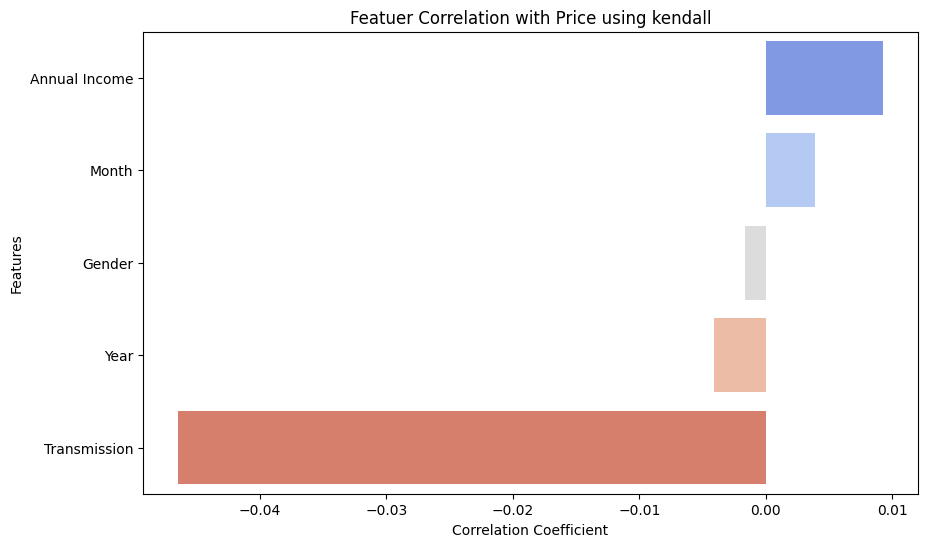

In [24]:
# Remove self-correlation and sort values
correlation_with_price = correlation_kendall["Price"].drop("Price")
correlation_with_price.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette="coolwarm")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.title("Featuer Correlation with Price using kendall")
plt.show()

#### **Chi-Square Test**
-	Categorical variable dependencies

In [25]:
# Create a contingency table between two categorical variables
contingency_table = pd.crosstab(cars_sales["Gender"], cars_sales["Dealer_Region"])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}, p-value: {p}")
#If the p-value < 0.05, it indicates a statistically significant correlation.

Chi-Square Value: 5.833030482352106, p-value: 0.4421518404880528


p = 0.44, which is much greater than 0.05, meaning:
There is no strong evidence that Gender affects the Dealer Region distribution.

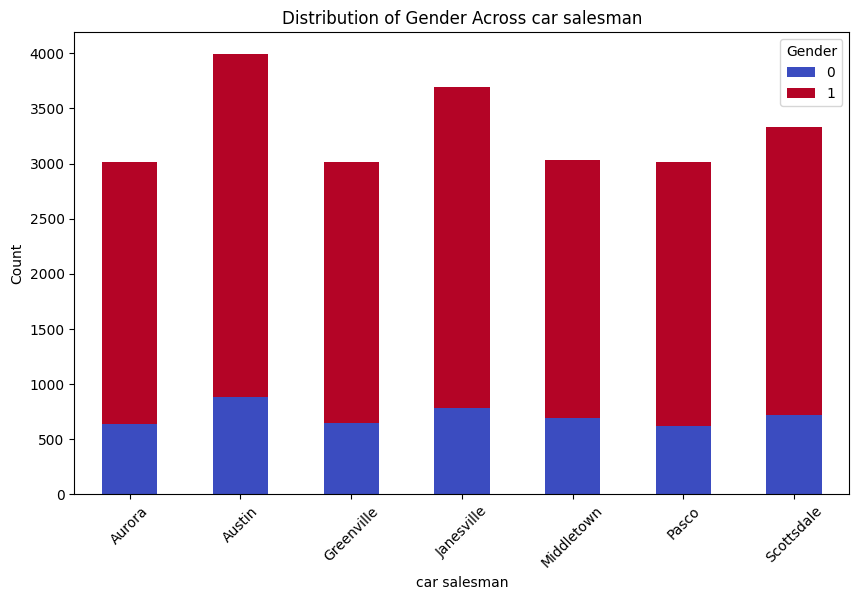

In [26]:
# Plot stacked bar chart
contingency_table.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title("Distribution of Gender Across car salesman")
plt.xlabel("car salesman")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

#### **Mutual Information**	
-  Non-linear relationships between numerical and categorical variable

In [27]:
X = cars_sales.drop(columns=["Price" , "DayOfWeek" , "Phone"]) # Features
y = cars_sales["Price"]  # Target variable

# Compute Mutual Information Score
mi_scores = mutual_info_regression(X.select_dtypes(include=['int64', 'float64']), y)
mi_scores_series = pd.Series(mi_scores, index=X.select_dtypes(include=['int64', 'float64']).columns)
print(mi_scores_series.sort_values(ascending=False))


Transmission     0.163566
Annual Income    0.109047
Year             0.011051
Month            0.006397
Gender           0.005135
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\449627528.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores_series.values, y=mi_scores_series.index, palette="coolwarm")


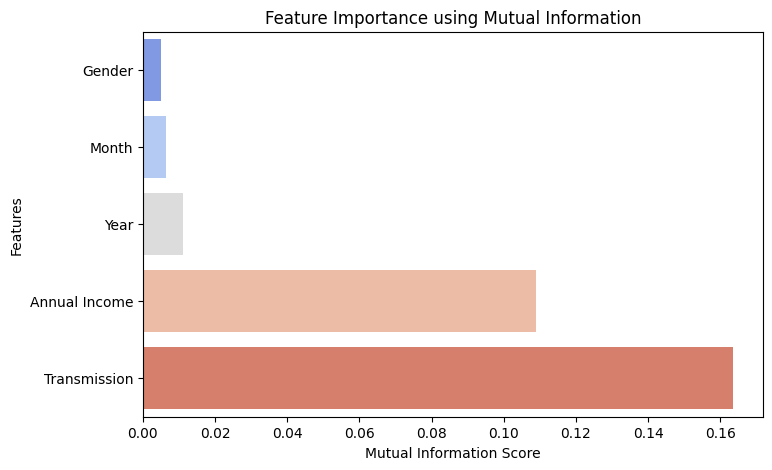

In [28]:
# Sort MI scores
mi_scores_series = mi_scores_series.sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=mi_scores_series.values, y=mi_scores_series.index, palette="coolwarm")

plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Importance using Mutual Information")
plt.show()


- Annual Income has the highest importance (~0.11). It strongly influences car price.
- Year has a lower influence (~0.01).
- Month has almost no impact (~0.003).

## **Feature Engineering**
- Feature engineering is the process of selecting and transforming raw data into features that can be used to train a machine learning model.
- for groubing culomns

#### **Grouping Months into Seasons**
- Instead of using individual months (1-12), we can categorize them into seasons:



In [29]:
# Define a function to map months to seasons
def map_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Apply the function to create a new column
cars_sales["Season"] = cars_sales["Month"].apply(map_season)
# One-hot encode the new "Season" column
cars_sales_groubing = pd.get_dummies(cars_sales, columns=["Season"], drop_first=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\280113075.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, palette="coolwarm")


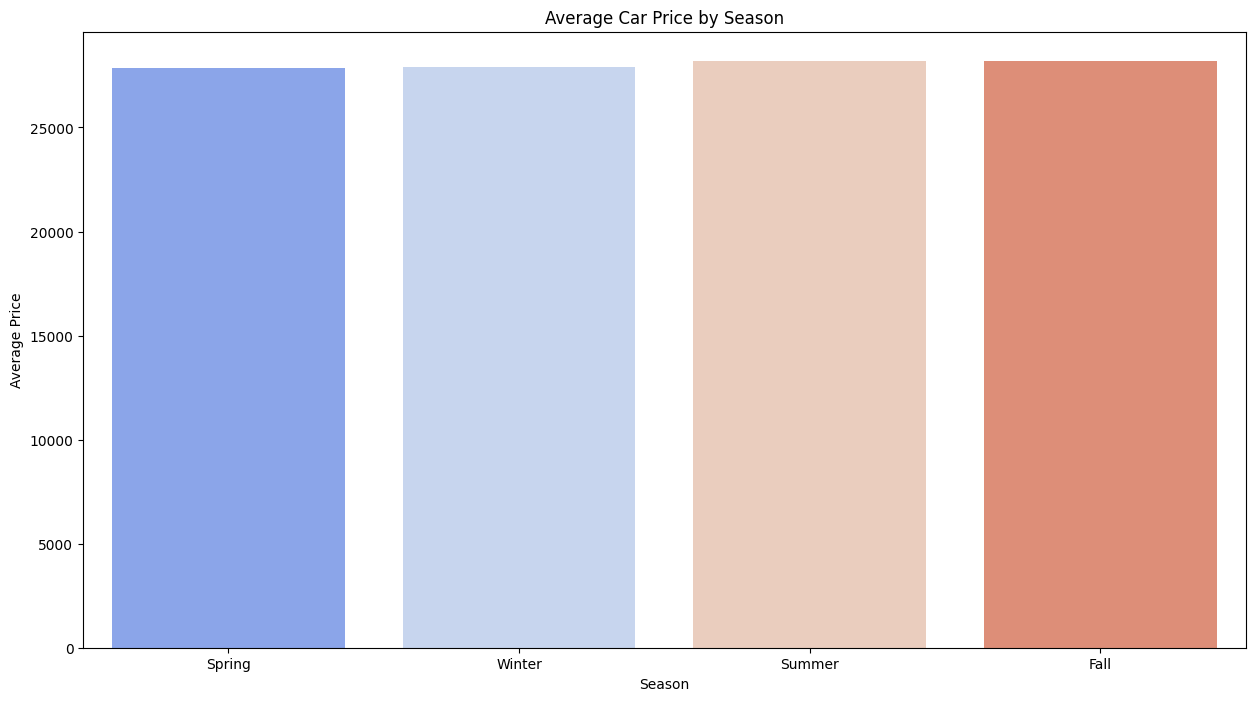

In [30]:
# Rename the one-hot encoded columns to match original seasons
cars_sales_groubing["Season"] = cars_sales["Season"]

# Group by Season and calculate average price
seasonal_trends = cars_sales_groubing.groupby("Season")["Price"].mean().sort_values()

# Plot the results
plt.figure(figsize=(15, 8))
sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, palette="coolwarm")
plt.title("Average Car Price by Season")
plt.xlabel("Season")
plt.ylabel("Average Price")
plt.show()

### **Analyzing Trends Across Years (Year-Month Feature)**
- Instead of using "Month" as a standalone feature, you can combine it with "Year" to create a time-based feature.



In [31]:
# Create a "Year-Month" feature
cars_sales["Year_Month"] = cars_sales["Year"].astype(str) + "-" + cars_sales["Month"].astype(str)

# Convert to datetime for trend analysis
cars_sales["Year_Month"] = pd.to_datetime(cars_sales["Year_Month"], format="%Y-%m")

# Extract useful features
cars_sales["Year_Month_Num"] = cars_sales["Year_Month"].dt.to_period("M").astype(int)


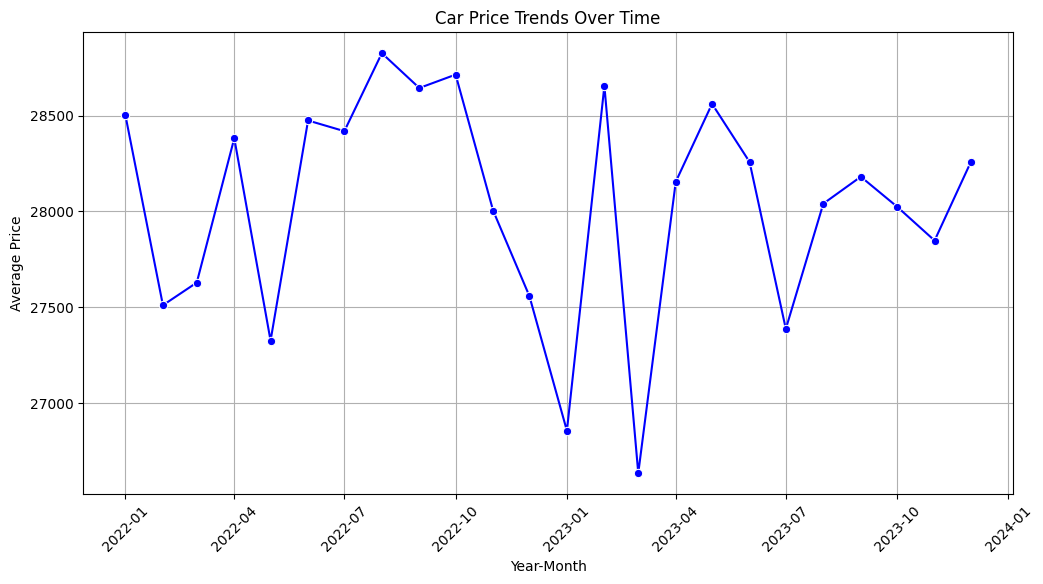

In [32]:
# Group by Year-Month and calculate average price
time_series_trends = cars_sales.groupby("Year_Month")["Price"].mean()
# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x=time_series_trends.index, y=time_series_trends.values, marker="o", color="b" )
plt.title("Car Price Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid()
plt.show()


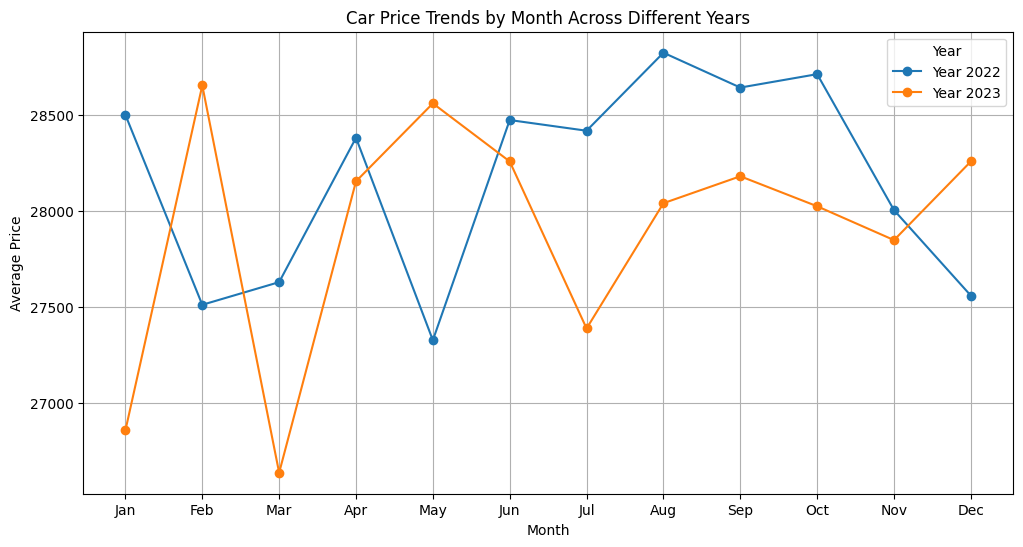

In [33]:
# Assuming your dataset has 'Year', 'Month', and 'Price' columns
# Group by Year and Month to calculate average price for each month per year
cars_sales['Year-Month'] = pd.to_datetime(cars_sales[['Year', 'Month']].assign(DAY=1))
avg_prices = cars_sales.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Plot the trends for different years
plt.figure(figsize=(12, 6))

# Loop through unique years and plot each one
for year in avg_prices['Year'].unique():
    subset = avg_prices[avg_prices['Year'] == year]
    plt.plot(subset['Month'], subset['Price'], marker='o', linestyle='-', label=f'Year {year}')

plt.title("Car Price Trends by Month Across Different Years")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.grid(True)
plt.show()


###  ANOVA for Price Variations 
- Example: Comparing Price across different Seasons

In [51]:
season_groups = [cars_sales[cars_sales["Season"] == season]["Price"] for season in cars_sales["Season"].unique()]
anova_result = f_oneway(*season_groups)

print(f"ANOVA Test Result for Price Across Seasons: F={anova_result.statistic:.4f}, p-value={anova_result.pvalue:.4f}")


ANOVA Test Result for Price Across Seasons: F=0.8586, p-value=0.4618


In [52]:
#Compare Price Across Different Car Models ---
model_groups = [cars_sales[cars_sales["Model"] == model]["Price"] for model in cars_sales["Model"].unique()]
anova_result_model = f_oneway(*model_groups)

print(f"ANOVA Test Result for Price Across Car Models: F={anova_result_model.statistic:.4f}, p-value={anova_result_model.pvalue:.4f}")

ANOVA Test Result for Price Across Car Models: F=48.1978, p-value=0.0000


###  T-Test

In [53]:
suv_prices = cars_sales[cars_sales["Body Style"] == "SUV"]["Price"]
passenger_prices = cars_sales[cars_sales["Body Style"] == "Passenger"]["Price"]

t_test_result = ttest_ind(suv_prices, passenger_prices, equal_var=False)
print(f"T-Test Result (SUV vs Passenger Car Prices): t={t_test_result.statistic:.4f}, p-value={t_test_result.pvalue:.4f}")

T-Test Result (SUV vs Passenger Car Prices): t=-6.9538, p-value=0.0000


In [54]:
# Compare Annual Income Between SUV and Hatchback Buyers ---
suv_income = cars_sales[cars_sales["Body Style"] == "SUV"]["Annual Income"]
hatchback_income = cars_sales[cars_sales["Body Style"] == "Hatchback"]["Annual Income"]

t_test_income = ttest_ind(suv_income, hatchback_income, equal_var=False)
print(f"T-Test Result (SUV vs Hatchback Annual Income): t={t_test_income.statistic:.4f}, p-value={t_test_income.pvalue:.4f}")

T-Test Result (SUV vs Hatchback Annual Income): t=-2.4791, p-value=0.0132


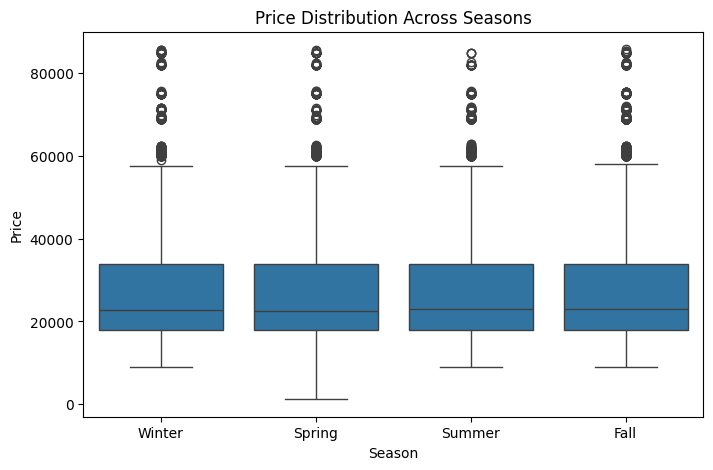

In [55]:
# Boxplot for Price Distribution by Season
plt.figure(figsize=(8, 5))
sns.boxplot(x="Season", y="Price", data=cars_sales)
plt.title("Price Distribution Across Seasons")
plt.show()

###  K-Means Clustering for Sales Behavior

In [57]:
 #Drop non-numeric columns for clustering
cars_sales_clean = cars_sales.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cars_sales_clean)

# Determine optimal clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


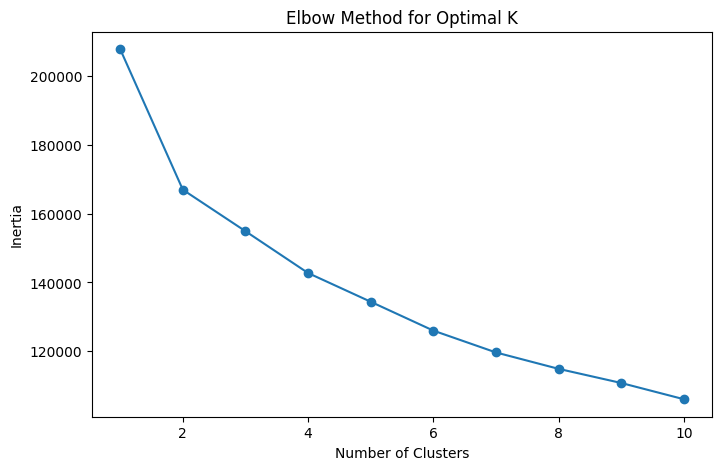

In [58]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [59]:
# Apply K-Means with optimal K (e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cars_sales["Cluster"] = kmeans.fit_predict(scaled_data)


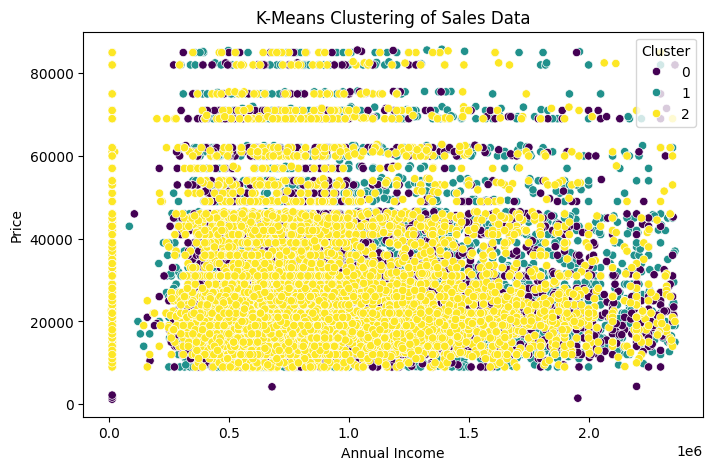

In [60]:
# Scatter Plot: Price vs Annual Income with Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Annual Income", y="Price", hue=cars_sales["Cluster"], palette="viridis", data=cars_sales)
plt.title("K-Means Clustering of Sales Data")
plt.show()

# **Data Visualization**

show the most expinsive price car and his count 

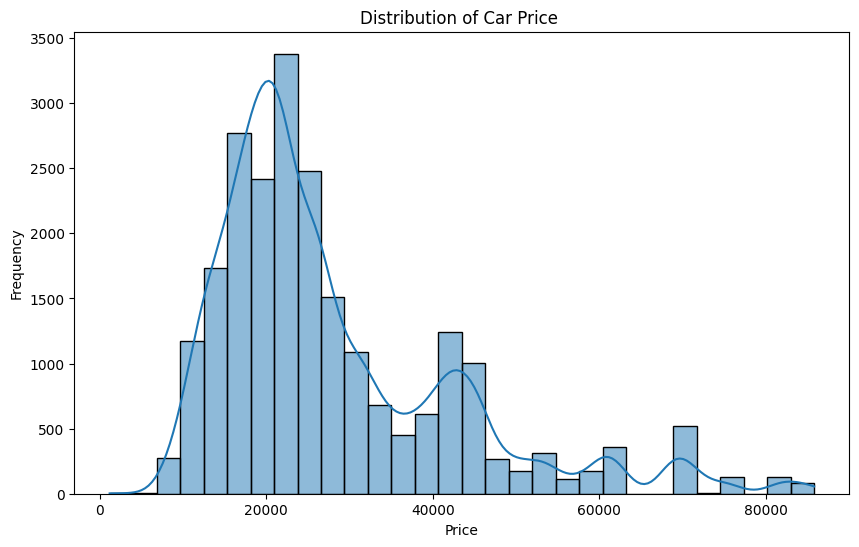

In [34]:
# Histogram for a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(cars_sales['Price'], bins=30, kde=True)
plt.title('Distribution of Car Price ')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

what the colors of cars and his count

In [35]:
print(cars_sales['Color'].value_counts())

Color
Pale White    10882
Black          7590
Red            4618
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\693353953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cars_sales, x='Color', order=cars_sales['Color'].value_counts().index ,  palette=['k', 'red', '#CCFFFF'])


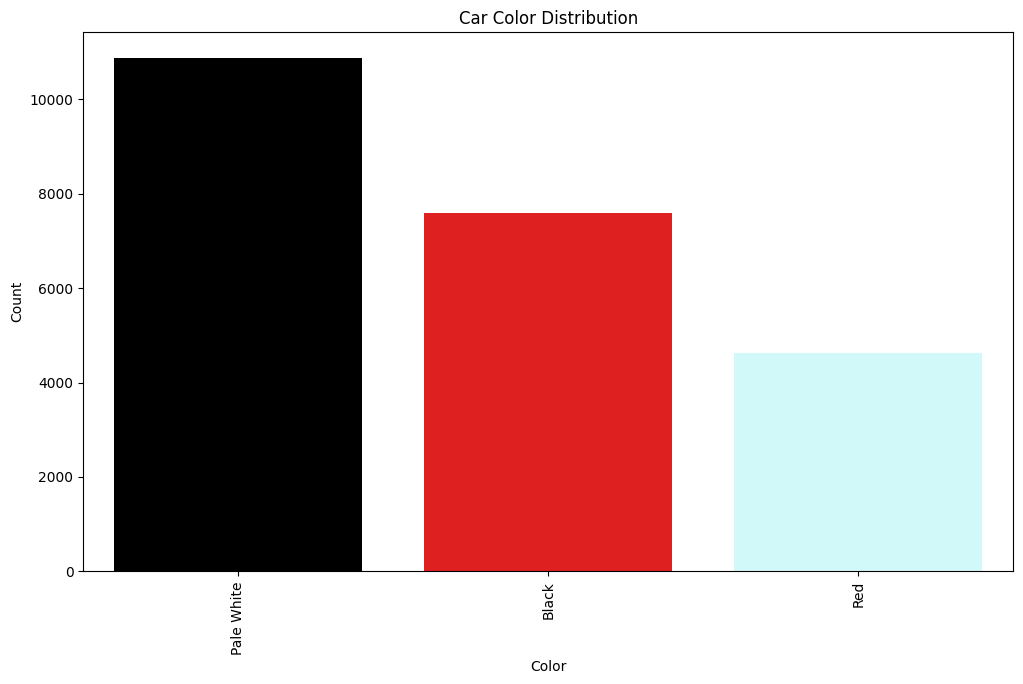

In [36]:
plt.figure(figsize=(12, 7))
sns.countplot(data=cars_sales, x='Color', order=cars_sales['Color'].value_counts().index ,  palette=['k', 'red', '#CCFFFF'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Car Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

what the models of cars and his count

In [37]:
print(cars_sales['Model'].value_counts())

Model
Diamante         402
Silhouette       400
Prizm            399
Passat           371
Jetta            370
                ... 
Mirage            19
Alero             18
RX300             15
Avalon            14
Sebring Conv.     10
Name: count, Length: 154, dtype: int64


There are many different models of cars , so we take a sample to analysis it                                                                     
 -let we analysis on the top 30 models

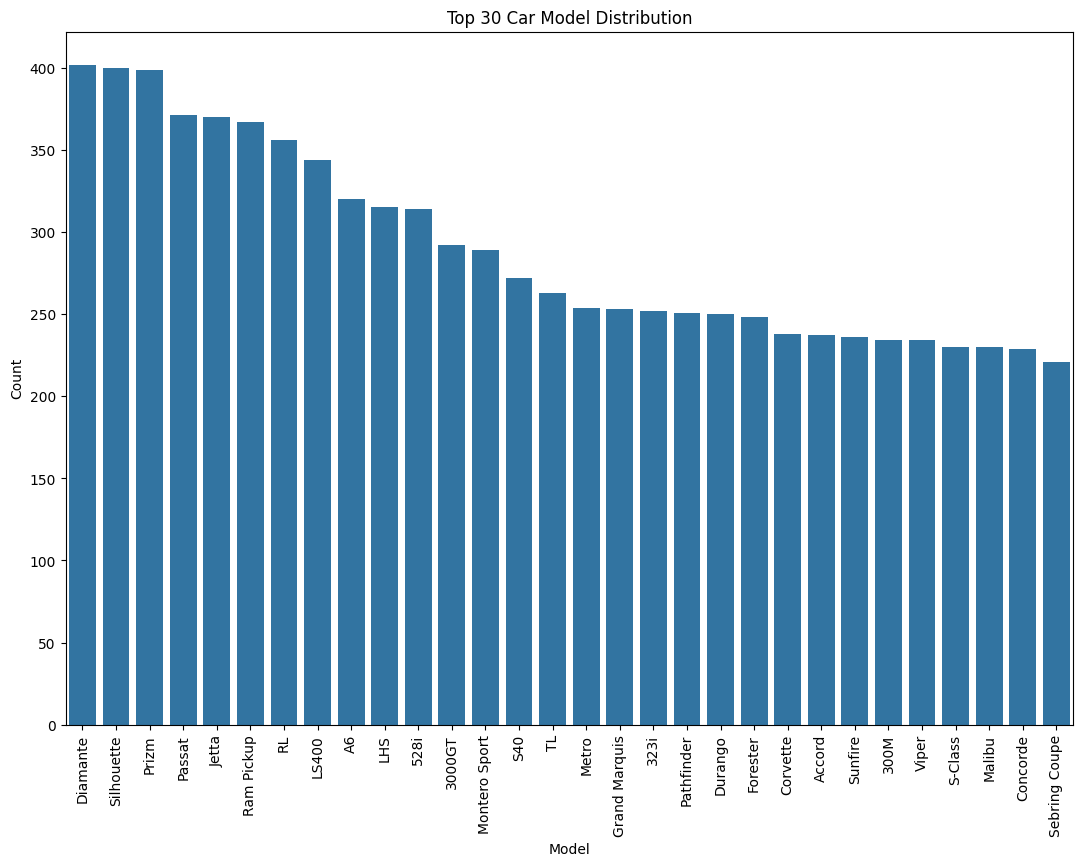

In [38]:
# Get the top 30 models by count
top_models = cars_sales['Model'].value_counts().nlargest(30)

# Filter the dataset to include only the top models
filtered_data = cars_sales[cars_sales['Model'].isin(top_models.index)]

# Plot the top 30 models
plt.figure(figsize=(13, 9))
sns.countplot(data=filtered_data, x='Model', order=top_models.index)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 30 Car Model Distribution')
plt.show()


relation between model and price for sample (top 30 models)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\3157162661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cars_sales[cars_sales['Model'].isin(top_models)], x='Model', y='Price' , order=top_models, palette='coolwarm')


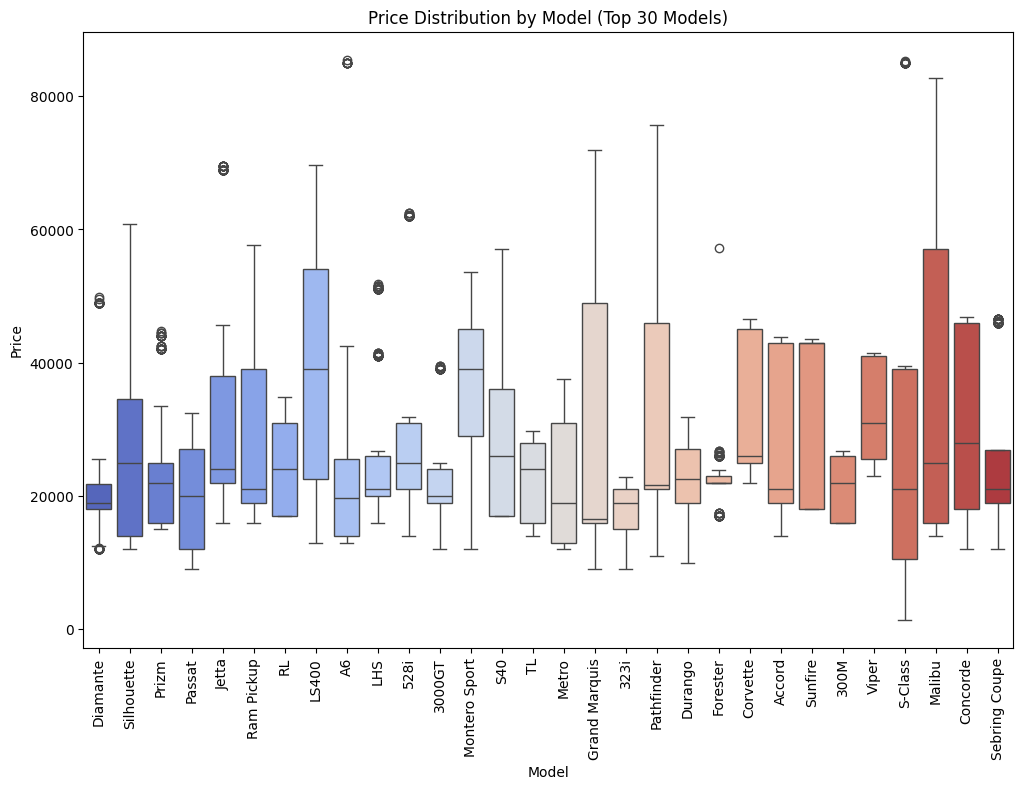

In [39]:
# Box plot of Price by Model (for top 30 models)
top_models = cars_sales['Model'].value_counts().nlargest(30).index
plt.figure(figsize=(12, 8))
sns.boxplot(data=cars_sales[cars_sales['Model'].isin(top_models)], x='Model', y='Price' , order=top_models, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Price Distribution by Model (Top 30 Models)')
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

make a relation betwen count of cars , price distribution for each of the top 30 models on the left y-axis , right y-axis


C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\804144351.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


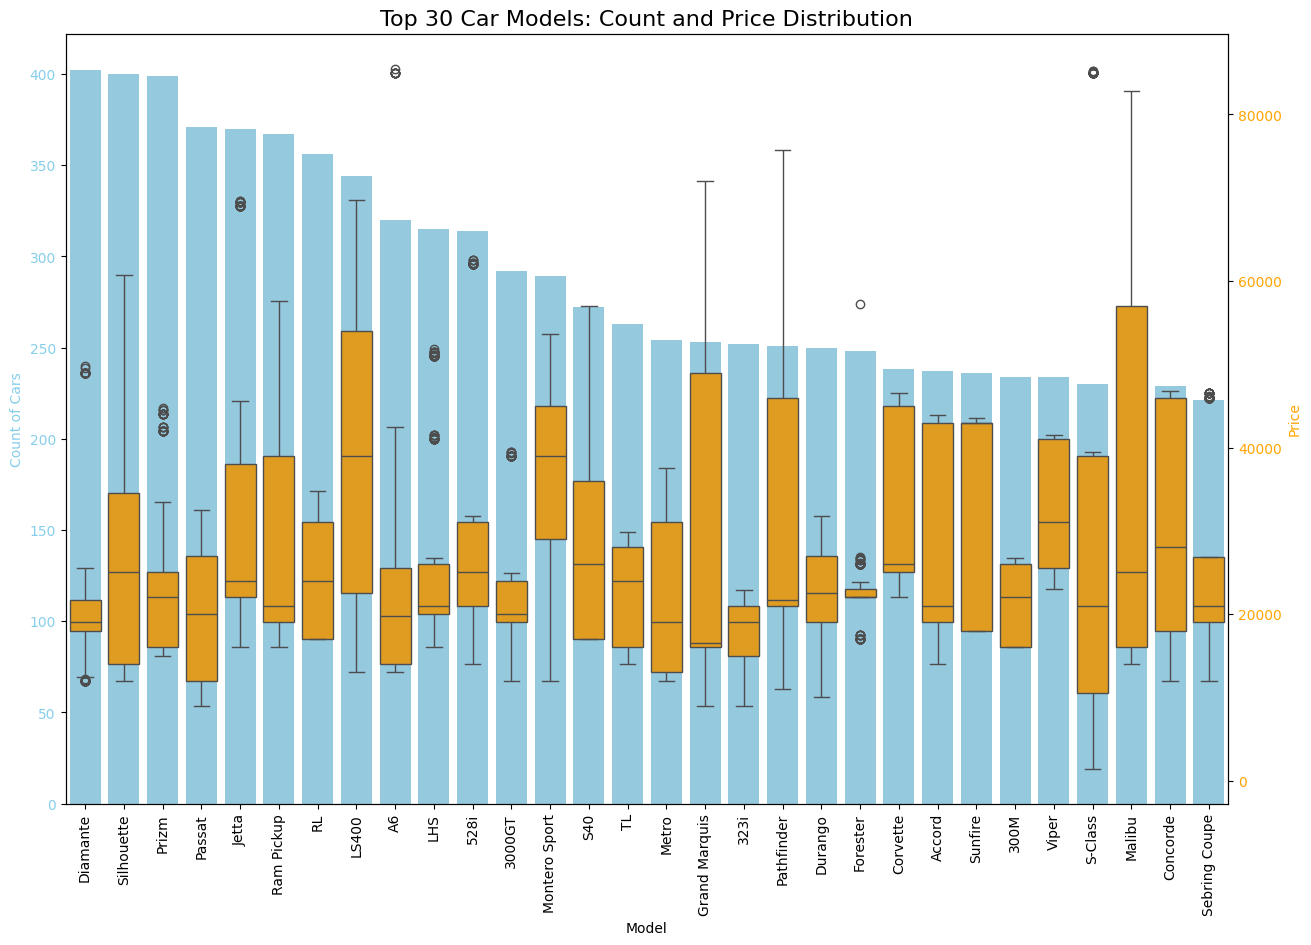

In [40]:
# Get the top 30 models by count
top_models = cars_sales['Model'].value_counts().nlargest(30).index

# Filter the dataset to include only the top models
filtered_data = cars_sales[cars_sales['Model'].isin(top_models)]

# Create a figure and a shared x-axis
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot the count of models (first analysis)
sns.countplot(data=filtered_data, x='Model', order=top_models, ax=ax1, color='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Model')
ax1.set_ylabel('Count of Cars', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the price distribution
ax2 = ax1.twinx()

# Plot the price distribution by model (second analysis)
sns.boxplot(data=filtered_data, x='Model', y='Price', order=top_models, ax=ax2, color='orange')
ax2.set_ylabel('Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title
plt.title('Top 30 Car Models: Count and Price Distribution', fontsize=16)

# Show the plot
plt.show()

Do car prices follow a seasonal trend?

C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\1605779940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Season", y="Price", data=cars_sales, palette="coolwarm")


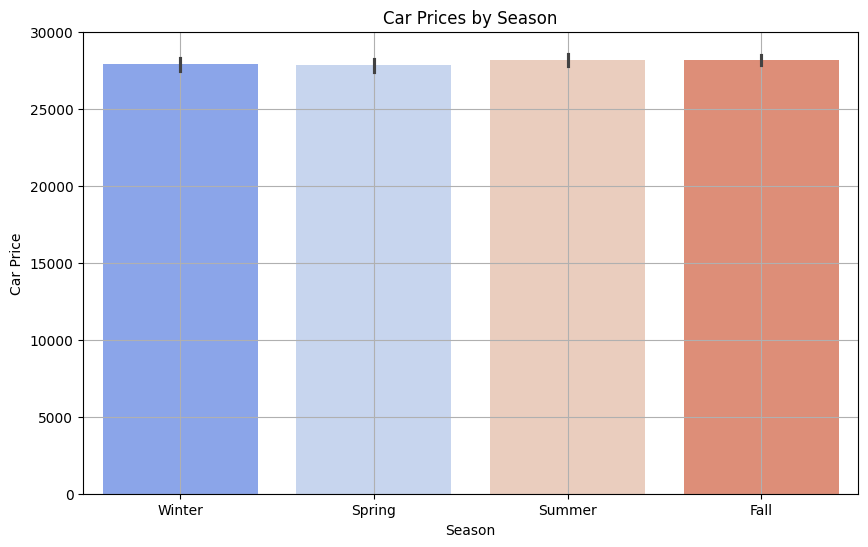

In [41]:
# Create Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Price", data=cars_sales, palette="coolwarm")
plt.title("Car Prices by Season")
plt.xlabel("Season")
plt.ylabel("Car Price")
plt.grid(True)

plt.show()


Which months have the highest price variation?

C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\476093002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Month", y="Price", data=cars_sales, palette="viridis")


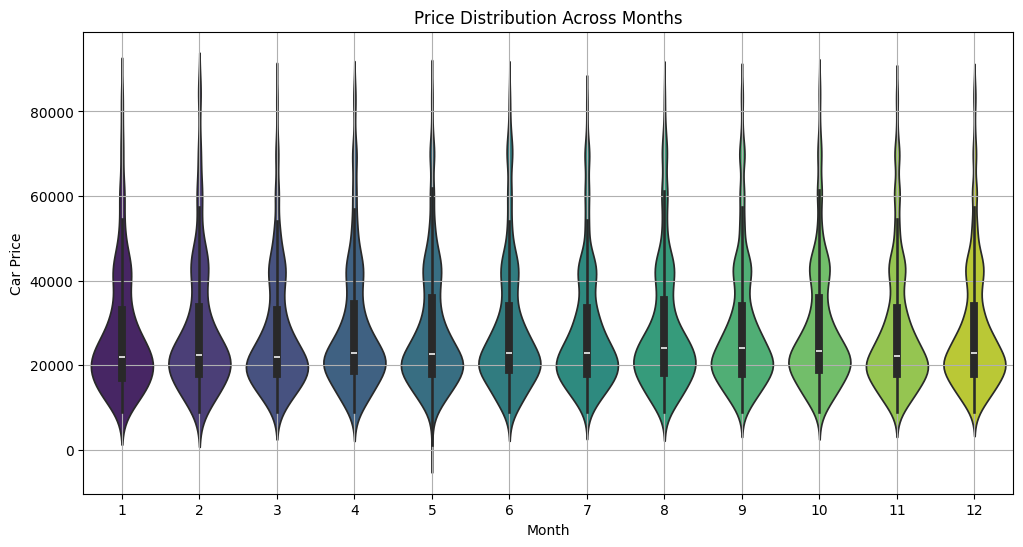

In [42]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Month", y="Price", data=cars_sales, palette="viridis")

plt.title("Price Distribution Across Months")
plt.xlabel("Month")
plt.ylabel("Car Price")
plt.grid(True)

plt.show()

Are expensive cars mostly sold in a specific month?

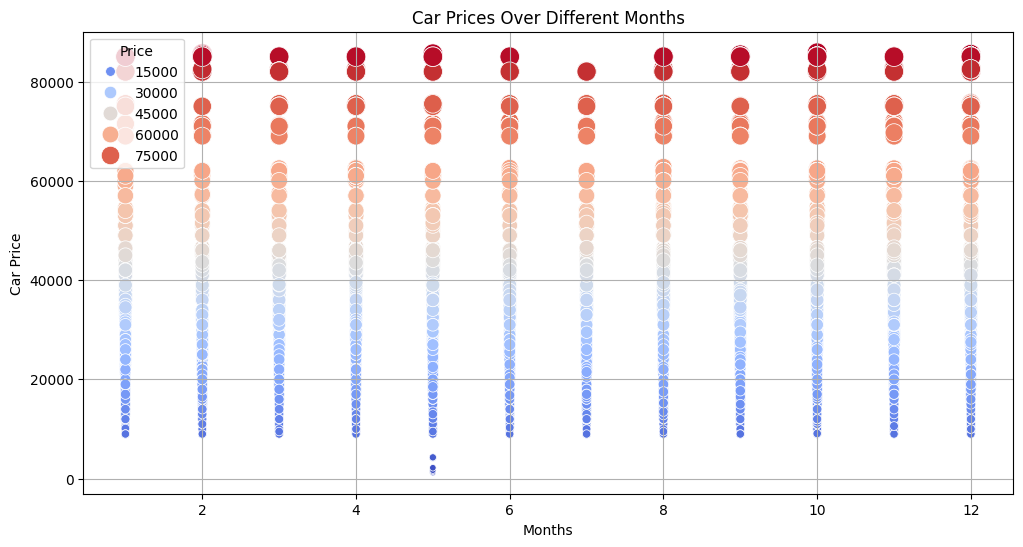

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Month", y="Price", data=cars_sales, hue="Price", palette="coolwarm", size="Price", sizes=(20, 200))
plt.title("Car Prices Over Different Months")
plt.xlabel("Months")
plt.ylabel("Car Price")
plt.grid(True)

plt.show()

How does annual income correlate with car prices?

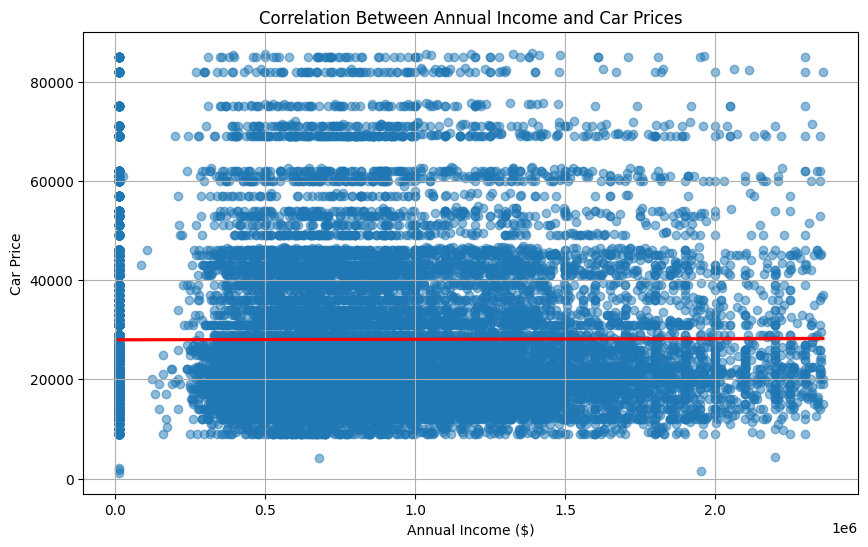

In [44]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Annual Income", y="Price", data=cars_sales, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title("Correlation Between Annual Income and Car Prices")
plt.xlabel("Annual Income ($)")
plt.ylabel("Car Price")
plt.grid(True)

plt.show()

How does the car’s transmission affect its price?

C:\Users\DELL\AppData\Local\Temp\ipykernel_15028\477774405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Transmission", y="Price", data=cars_sales, palette="coolwarm")


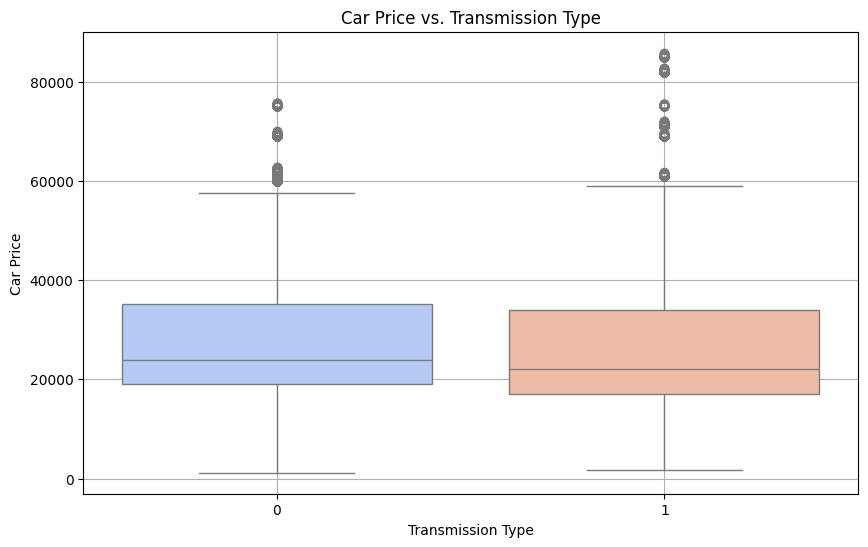

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Transmission", y="Price", data=cars_sales, palette="coolwarm")
plt.title("Car Price vs. Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Car Price")
plt.grid(True)
plt.show()


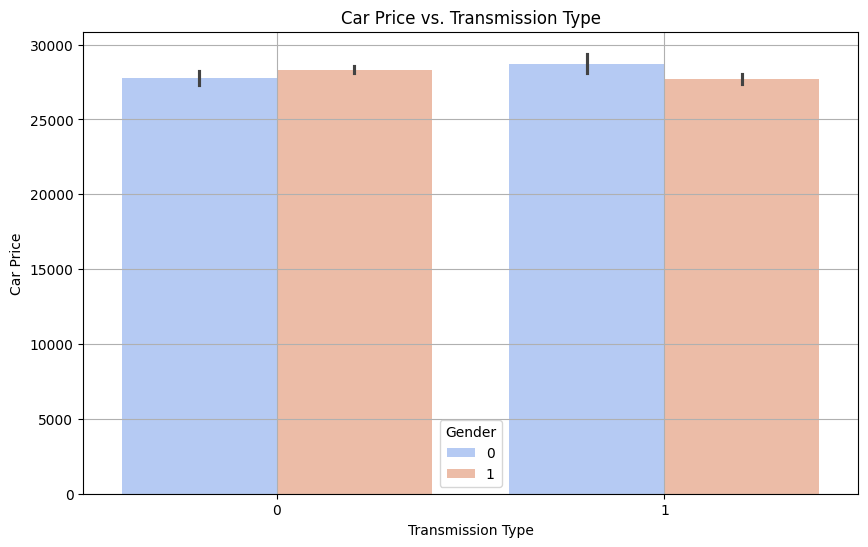

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Transmission", y="Price", hue="Gender", data=cars_sales, palette="coolwarm")
plt.title("Car Price vs. Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Car Price")
plt.grid(True)
plt.show()


Does car color affect its price?

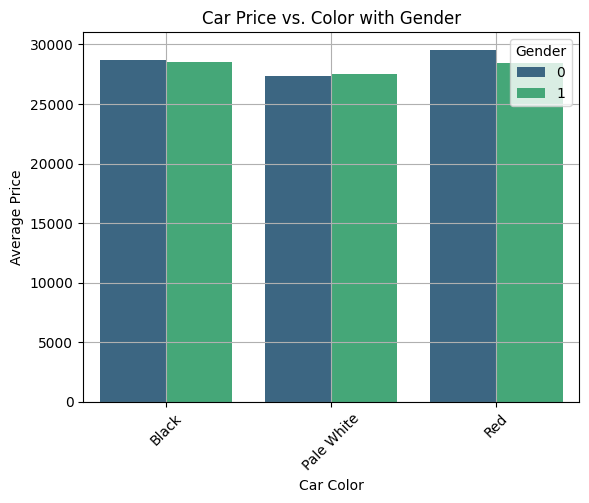

In [47]:
# Ensure color_trend is a DataFrame
color_trend = cars_sales.groupby(["Color", "Gender"])["Price"].mean().reset_index()
# Corrected barplot
sns.barplot(x="Color", y="Price", hue="Gender", data=color_trend, palette="viridis")
plt.title("Car Price vs. Color with Gender")
plt.xlabel("Car Color")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

How does the body style impact the price?

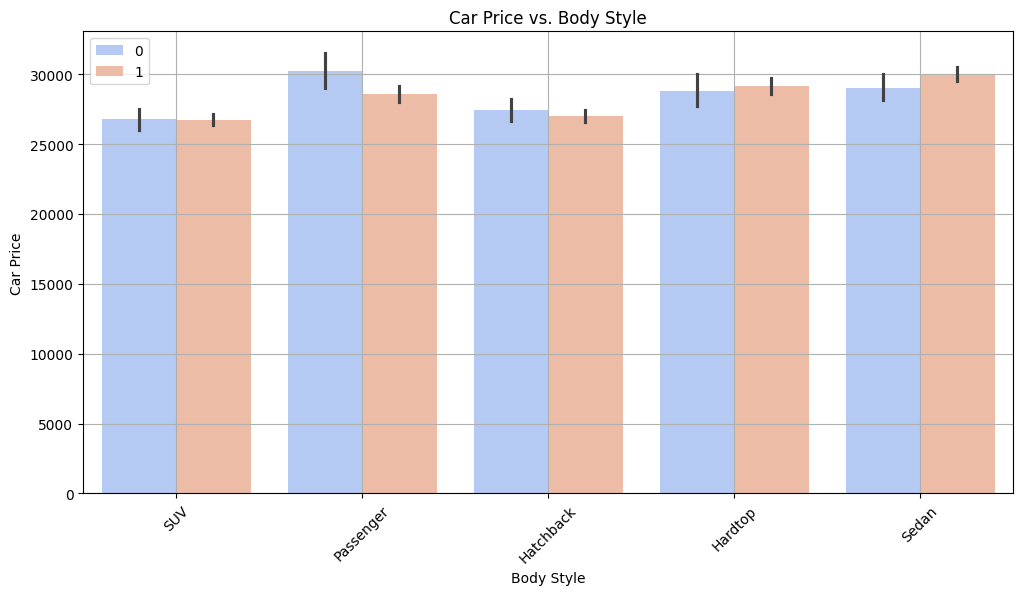

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Body Style", y="Price", hue="Gender", data=cars_sales, palette="coolwarm")
plt.title("Car Price vs. Body Style")
plt.xlabel("Body Style")
plt.ylabel("Car Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


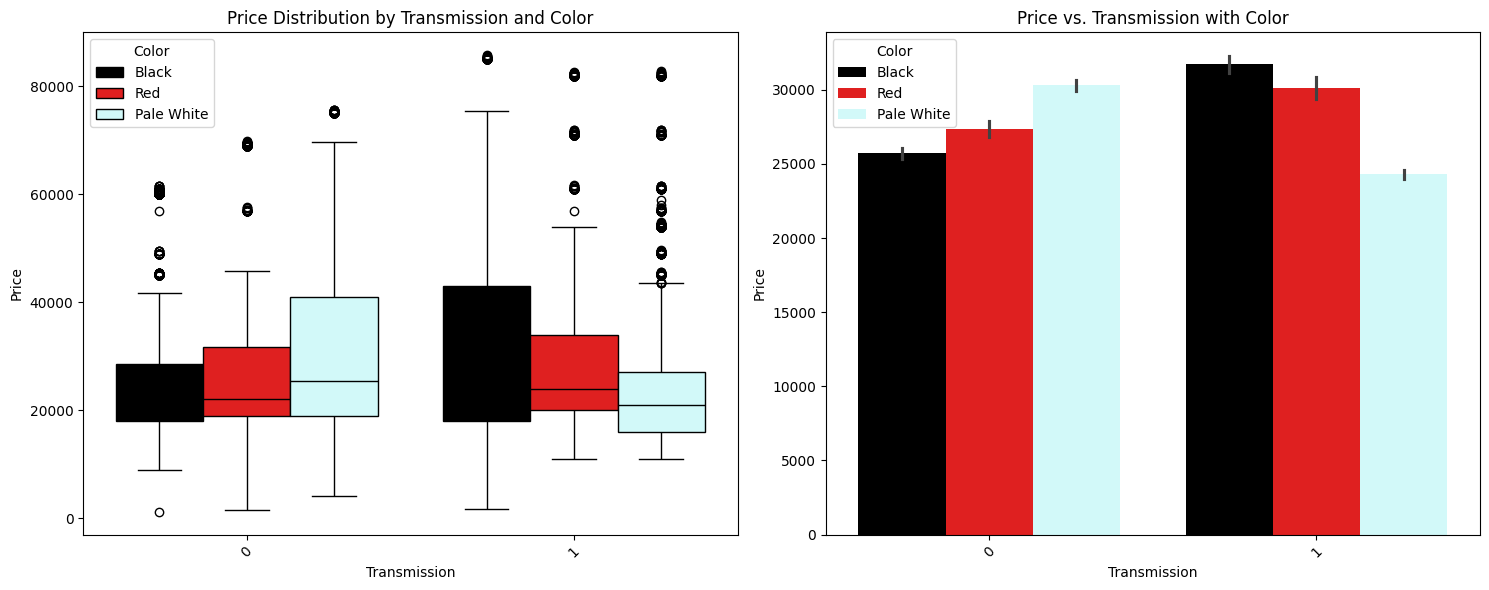

In [49]:
plt.figure(figsize=(15, 6))

# Boxplot: Transmission vs. Price, colored by Car Color
plt.subplot(1, 2, 1)
sns.boxplot(x="Transmission", y="Price", hue="Color", data=cars_sales,  palette=['k', 'red', '#CCFFFF'])
plt.title("Price Distribution by Transmission and Color")
plt.xticks(rotation=45)

# Barplot: Transmission vs. Price, with Color-coded Cars
plt.subplot(1, 2, 2)
sns.barplot(x="Transmission", y="Price", hue="Color", data=cars_sales, 
            palette=['k', 'red', '#CCFFFF'])  # Fixed 'red' instead of 'read'
plt.title("Price vs. Transmission with Color")
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:

  
import pandas as pd  
import dash  
from dash import dcc, html, Output, Input  
import plotly.express as px  
  
 
df = pd.read_csv("../Milestone1/Car_sales_CleanData.csv", encoding="utf-8")  
df['Date'] = pd.to_datetime(df['Date'])  
  

df['Year'] = df['Date'].dt.year  
df['Month'] = df['Date'].dt.month  
  

app = dash.Dash(__name__)  
  

app.layout = html.Div([  
    html.H1("Car Sales Interactive Dashboard", style={"textAlign": "center"}),  
      
    html.Div([  
        html.Div([  
            html.Label("Select Year:"),  
            dcc.Dropdown(  
                id='year_filter',  
                options=[{'label': str(year), 'value': year} for year in sorted(df['Year'].unique())],  
                value=sorted(df['Year'].unique())[0]  
            ),  
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),  
        
        html.Div([  
            html.Label("Select Month:"),  
            dcc.Dropdown(  
                id='month_filter',  
                options=[{'label': str(month), 'value': month} for month in sorted(df['Month'].unique())],  
                value=sorted(df['Month'].unique())[0]  
            ),  
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),  
          
        html.Div([  
            html.Label("Select Car Model:"),  
            dcc.Dropdown(  
                id='model_filter',  
                options=[{'label': model, 'value': model} for model in sorted(df['Model'].unique())],  
                value=None,  
                multi=True,  
                placeholder="All Models"  
            ),  
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),  
    ], style={'display': 'flex', 'justify-content': 'center'}),  
      
    dcc.Graph(id='price_trend_chart'),  
    dcc.Graph(id='model_sales_chart')  
])  
  

@app.callback(  
    [Output('price_trend_chart', 'figure'),  
     Output('model_sales_chart', 'figure')],  
    [Input('year_filter', 'value'),  
     Input('month_filter', 'value'),  
     Input('model_filter', 'value')]  
)  
def update_charts(selected_year, selected_month, selected_models):  
    
    dff = df[(df['Year'] == selected_year) & (df['Month'] == selected_month)]  
    if selected_models is not None and len(selected_models)>0:  
        dff = dff[dff['Model'].isin(selected_models)]  
      
     
    agg_price = dff.groupby('Date')['Price ($)'].mean().reset_index()  
      
    fig_line = px.line(agg_price, x='Date', y='Price ($)',  
                       title="Average Sale Price Trend",  
                       labels={"Price ($)": "Average Price", "Date": "Sale Date"})  
    fig_line.update_layout(  
        title={'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},  
        margin=dict(l=40, r=40, t=60, b=40)  
    )  
      
     
    agg_model = dff.groupby('Model').size().reset_index(name='Sales Count')  
      
    fig_bar = px.bar(agg_model, x='Model', y='Sales Count',  
                     title="Sales Count by Car Model",  
                     labels={"Sales Count": "Sales Count", "Model": "Car Model"})  
    fig_bar.update_layout(  
        title={'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},  
        margin=dict(l=40, r=40, t=60, b=40)  
    )  
      
    return fig_line, fig_bar  
  
if __name__ == '__main__':  
   
    app.run_server(debug=True)  
      
print("Dashboard code executed. Follow the instructions in the notebook to interact with it.")  

Dashboard code executed. Follow the instructions in the notebook to interact with it.


Exception in thread Thread-3 (<lambda>):
Traceback (most recent call last):
  File "e:\ahmed\Lib\threading.py", line 1041, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "C:\Users\Ahmed\AppData\Roaming\Python\Python313\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "e:\ahmed\Lib\threading.py", line 992, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\ahmed\Lib\site-packages\dash\dash.py", line 1857, in <lambda>
    if debug is None:
    
    ...<3 lines>...
        debug=debug,
        ^^^^^
  File "e:\ahmed\Lib\site-packages\dash\_watch.py", line 35, in watch
    walk()
    ~~~~^^
  File "e:\ahmed\Lib\site-packages\dash\_watch.py", line 20, in walk
    info = os.stat(path)
FileNotFoundError: [WinError 2] The system cannot find the file specified: 'e:\\ahmed\\Lib\\site-packages\\dash\\html\\__pycache__\\Keygen.cpython-313.pyc.188

In [ ]:


import dash
from dash import dcc, html, Input, Output
from jupyter_dash import JupyterDash
import dash_bootstrap_components as dbc
    
import plotly.express as px
import plotly.graph_objects as go


try:
    df = pd.read_csv('Car_sales_CleanData.csv', encoding='utf-8')
    print('Data loaded successfully.')
    print(df.head())
except Exception as e:
    print('Error loading data:', e)


if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


if 'Price ($)' in df.columns:
    df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')


bins = [0, 15000, 25000, np.inf]
labels = ['Low (<15k)', 'Medium (15k-25k)', 'High (>25k)']
if 'Price ($)' in df.columns:
    df['Price_Range'] = pd.cut(df['Price ($)'], bins=bins, labels=labels)
else:
    df['Price_Range'] = 'Unknown'

# Ensure a Season column exists
if 'Season' not in df.columns and 'Date' in df.columns:
    df['Season'] = np.where(df['Date'].dt.month.isin([12,1,2]), 'Winter',
                        np.where(df['Date'].dt.month.isin([3,4,5]), 'Spring',
                        np.where(df['Date'].dt.month.isin([6,7,8]), 'Summer',
                        'Fall')))


app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H2('Car Sales Dashboard: Gender, Price Range & Seasonal Analysis',
                              className='text-center text-primary mb-4'))),
    dbc.Row([
        dbc.Col([
            html.Label('Select Gender:'),
            dcc.Dropdown(
                id='gender_dropdown',
                options=[{'label': g, 'value': g} for g in sorted(df['Gender'].dropna().unique())],
                multi=True,
                placeholder='Filter by Gender'
            ),
        ], width=4),
        dbc.Col([
            html.Label('Select Price Range:'),
            dcc.Dropdown(
                id='price_dropdown',
                options=[{'label': pr, 'value': pr} for pr in df['Price_Range'].cat.categories],
                multi=True,
                placeholder='Filter by Price Range'
            ),
        ], width=4),
        dbc.Col([
            html.Label('Select Season:'),
            dcc.Dropdown(
                id='season_dropdown',
                options=[{'label': s, 'value': s} for s in sorted(df['Season'].dropna().unique())],
                multi=True,
                placeholder='Filter by Season'
            ),
        ], width=4),
    ], className='mb-4'),
    dbc.Row([
        dbc.Col(dcc.Graph(id='gender_bar_chart'), width=6),
        dbc.Col(dcc.Graph(id='price_box_plot'), width=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='season_line_chart'), width=12)
    ])
], fluid=True)


@app.callback(
    [Output('gender_bar_chart', 'figure'),
     Output('price_box_plot', 'figure'),
     Output('season_line_chart', 'figure')],
    [Input('gender_dropdown', 'value'),
     Input('price_dropdown', 'value'),
     Input('season_dropdown', 'value')]
)

def update_graphs(selected_gender, selected_price, selected_season):
    
    filtered_df = df.copy()
    if selected_gender and len(selected_gender) > 0:
        filtered_df = filtered_df[filtered_df['Gender'].isin(selected_gender)]
    if selected_price and len(selected_price) > 0:
        filtered_df = filtered_df[filtered_df['Price_Range'].isin(selected_price)]
    if selected_season and len(selected_season) > 0:
        filtered_df = filtered_df[filtered_df['Season'].isin(selected_season)]

    
    gender_counts = filtered_df['Gender'].value_counts().reset_index()
    gender_counts.columns = ['Gender', 'Sales Count']
    fig_gender = px.bar(gender_counts, x='Gender', y='Sales Count', color='Gender',
                        title='Sales Count by Gender')
    fig_gender.update_layout(margin=dict(l=40, r=40, t=60, b=40))

   
    fig_price = px.box(filtered_df, x='Price_Range', y='Price ($)',
                       title='Price Distribution by Price Range')
    fig_price.update_layout(margin=dict(l=40, r=40, t=60, b=40))

    
    if 'Date' in filtered_df.columns and pd.api.types.is_datetime64_any_dtype(filtered_df['Date']):
        time_df = filtered_df.copy()
        time_df['YearMonth'] = time_df['Date'].dt.to_period('M').astype(str)
        avg_price = time_df.groupby(['YearMonth', 'Season'])['Price ($)'].mean().reset_index()
        fig_season = px.line(avg_price, x='YearMonth', y='Price ($)', color='Season',
                             title='Average Price Over Time by Season')
        fig_season.update_layout(margin=dict(l=40, r=40, t=60, b=40), xaxis_tickangle=-45)
    else:
        fig_season = go.Figure()
        fig_season.update_layout(title='No Date data available')

    return fig_gender, fig_price, fig_season


app.run_server(mode='inline', debug=True)

print('Dashboard running. Interact with it in the output area.')

Error loading data: [Errno 2] No such file or directory: 'Car_sales_CleanData.csv'


e:\ahmed\Lib\site-packages\dash\dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Dashboard running. Interact with it in the output area.


In [ ]:


import pandas as pd
import numpy as np
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash


df = pd.read_csv('../MileStone1/Car_sales_CleanData.csv', encoding='utf-8')


df['Date'] = pd.to_datetime(df['Date'])


app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1('Car Sales Dashboard', className='text-center my-4'), width=12)
    ]),
    dbc.Row([
        
        dbc.Col([
            html.H4('Filters', className='mb-3'),
            html.Label('Select Year:'),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(year), 'value': year} for year in sorted(df['Year'].unique())],
                value=df['Year'].max(),
                clearable=False
            ),
            html.Label('Select Gender:', className='mt-3'),
            dcc.Dropdown(
                id='gender-dropdown',
                options=[{'label': gender, 'value': gender} for gender in sorted(df['Gender'].unique())],
                value=list(df['Gender'].unique()),
                multi=True
            ),
            html.Label('Select Season:', className='mt-3'),
            dcc.Dropdown(
                id='season-dropdown',
                options=[{'label': season, 'value': season} for season in sorted(df['Season'].unique())],
                value=list(df['Season'].unique()),
                multi=True
            )
        ], width=3),
        
        dbc.Col([
            dbc.Row([
                
                dbc.Col(
                    dbc.Card([
                        dbc.CardHeader('Sales by Gender'),
                        dbc.CardBody(dcc.Graph(id='gender-pie-chart'))
                    ]), width=6
                ),
                
                dbc.Col(
                    dbc.Card([
                        dbc.CardHeader('Sales by Price Range'),
                        dbc.CardBody(dcc.Graph(id='price-histogram'))
                    ]), width=6
                )
            ], className='mb-4'),
            dbc.Row([
                
                dbc.Col(
                    dbc.Card([
                        dbc.CardHeader('Sales by Season'),
                        dbc.CardBody(dcc.Graph(id='season-bar-chart'))
                    ]), width=6
                ),
                
                dbc.Col(
                    dbc.Card([
                        dbc.CardHeader('Top Car Models'),
                        dbc.CardBody(dcc.Graph(id='model-bar-chart'))
                    ]), width=6
                )
            ])
        ], width=9)
    ])
], fluid=True)


@app.callback(
    [Output('gender-pie-chart', 'figure'),
     Output('price-histogram', 'figure'),
     Output('season-bar-chart', 'figure'),
     Output('model-bar-chart', 'figure')],
    [Input('year-dropdown', 'value'),
     Input('gender-dropdown', 'value'),
     Input('season-dropdown', 'value')]
)
def update_charts(selected_year, selected_genders, selected_seasons):
    
    filtered_df = df.copy()
    if selected_year:
        filtered_df = filtered_df[filtered_df['Year'] == selected_year]
    if selected_genders:
        if not isinstance(selected_genders, list):
            selected_genders = [selected_genders]
        filtered_df = filtered_df[filtered_df['Gender'].isin(selected_genders)]
    if selected_seasons:
        if not isinstance(selected_seasons, list):
            selected_seasons = [selected_seasons]
        filtered_df = filtered_df[filtered_df['Season'].isin(selected_seasons)]
    
   
    gender_counts = filtered_df['Gender'].value_counts().reset_index()
    gender_counts.columns = ['Gender', 'Count']
    gender_pie = px.pie(
        gender_counts, 
        values='Count', 
        names='Gender',
        title='Sales by Gender',
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    gender_pie.update_traces(textposition='inside', textinfo='percent+label')
    
    
    price_hist = px.histogram(
        filtered_df,
        x='Price ($)',
        nbins=20,
        title='Distribution of Car Prices',
        color_discrete_sequence=['#766CDB']
    )
    price_hist.update_layout(bargap=0.1)
    
   
    season_counts = filtered_df['Season'].value_counts().reset_index()
    season_counts.columns = ['Season', 'Count']
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    season_counts['Season'] = pd.Categorical(season_counts['Season'], categories=season_order, ordered=True)
    season_counts = season_counts.sort_values('Season')
    season_bar = px.bar(
        season_counts,
        x='Season',
        y='Count',
        title='Sales by Season',
        color='Season',
        color_discrete_sequence=['#7CD9A5', '#D9CC8B', '#DA847C', '#877877']
    )
    
    
    model_counts = filtered_df['Model'].value_counts().reset_index()
    model_counts.columns = ['Model', 'Count']
    top_models = model_counts.head(10)
    model_bar = px.bar(
        top_models,
        x='Count',
        y='Model',
        title='Top 10 Car Models',
        orientation='h',
        color='Count',
        color_continuous_scale='Viridis'
    )
    model_bar.update_layout(yaxis={'categoryorder': 'total ascending'})
    
    return gender_pie, price_hist, season_bar, model_bar


app.run_server(mode='external', port=8051, use_reloader=False)

print('Dashboard is running on external mode at port 8051')

e:\ahmed\Lib\site-packages\dash\dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Dash app running on http://127.0.0.1:8051/
Dashboard is running on external mode at port 8051


#


<head>
    <title>Team Credits</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color:rgba(23, 20, 20, 0.74);
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
        }
        .container {
            text-align: center;
            background-color:rgb(44, 130, 183);
            padding: 40px;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            max-width: 1100px;
            width: 100%;
        }
        h1 {
            color: #333;
            font-size: 2.5em;
            margin-bottom: 10px;
        }
        h3 {
            color: #333;
            font-size: 1.5em;
            margin: 20px 0;
        }
        ul {
            list-style: none;
            padding: 0;
            margin: 20px 0;
        }
        ul li {
            font-size: 1.2em;
            margin: 10px 0;
        }
        ul li a {
            color: #333;
            text-decoration: none;
            transition: color 0.3s;
        }
        ul li a:hover {
            color: #007bff;
        }
        .github-section {
            margin-top: 30px;
        }
        .github-section p {
            color: #333;
            font-size: 1.1em;
            margin-bottom: 10px;
        }
        .github-section a img {
            width: 50px;
            height: 50px;
            transition: transform 0.3s;
        }
        .github-section a img:hover {
            transform: scale(1.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Thank You for Your Time and Efforts!</h1>
        <h3>This Work Done By Our Team:</h3>
        <ul>
            <li><a href="https://github.com/youssef-113" target="_blank">Youssef Bassiony Abdlah</a></li>
            <li><a href="https://github.com/AhmedGamall-1" target="_blank">Ahmed Gamall</a></li>
            <li><a href="https://github.com/Begad" target="_blank">Begad Abdelghafar</a></li>
            <li><a href="https://github.com/MustafaNasser005" target="_blank">Mustafa Nasser</a></li>
            <li><a href="https://github.com/mohamedamr21c" target="_blank">Mohammed Amr </a></li>
        </ul>
        <div class="github-section">
            <p>For GitHub Repository</p>
            <a href="https://github.com/AhmedGamall-1/Sales-forcasting-and-optmization/tree/main" title="Redirect to GitHub" target="_blank">
                <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="GitHub">
            </a>
        </div>

</body>
